In [1]:
%matplotlib notebook

import math

import numpy as np
import sympy as sp

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Les angles d'euler

Le repère _body_ est un repère orthonormal direct, centré sur l'hélicoptère et défini comme suit:

1. x est l'axe longitudinal orienté vers l'avant
2. y est l'axe latéral orienté vers la droite
3. z est l'axe vertical orienté vers le bas

Le repère _earth_ est un repère orthonormal direct, centré sur l'hélicoptère et défini comme suit:

1. x est orienté vers le nord
2. y est orienté vers l'est
3. z est orienté vers le bas

On passe du repère _earth_ au repère _body_ par 3 rotations effectuées dans cet ordre :

1. lacet ($\psi$) suivant l'axe z, positif à droite, 0° au nord
2. tangage ($\theta$) suivant l'axe y, positif à cabrer
3. roulis ($\varphi$) suivant l'axe x, positif dans le sens horaire

Le changement de repère du repère _body_ au repère _earth_ s'écrit donc comme la composition de ces trois rotations :

$$ \begin{bmatrix}
x_E \\
y_E \\
z_E \\
\end{bmatrix} = \mathbf{R}_\psi \mathbf{R}_\theta \mathbf{R}_\varphi \begin{bmatrix}
x_B \\
y_B \\
z_B \\
\end{bmatrix}$$

$$ \begin{bmatrix}
x_E \\
y_E \\
z_E \\
\end{bmatrix} = \begin{bmatrix}
    \cos \psi & -\sin \psi & 0 \\
    \sin \psi & \cos \psi & 0 \\
    0 & 0 & 1
\end{bmatrix} \begin{bmatrix}
    \cos \theta & 0 & -\sin \theta \\
    0 & 1 & 0 \\
    \sin \theta & 0 & \cos \theta
\end{bmatrix} \begin{bmatrix}
    1 & 0 & 0 \\
    0 & \cos \varphi & \sin \varphi \\
    0 & -\sin \varphi & \cos \varphi
\end{bmatrix} \begin{bmatrix}
x_B \\
y_B \\
z_B \\
\end{bmatrix}$$

In [2]:
phi = sp.symbols('varphi')
theta = sp.symbols('theta')
psi = sp.symbols('psi')

R_phi = sp.Matrix([[1, 0, 0], [0, sp.cos(phi), sp.sin(phi)], [0, -sp.sin(phi), sp.cos(phi)]])
R_theta = sp.Matrix([[sp.cos(theta), 0, -sp.sin(theta)], [0, 1, 0], [sp.sin(theta), 0, sp.cos(theta)]])
R_psi = sp.Matrix([[sp.cos(psi), -sp.sin(psi), 0], [sp.sin(psi), sp.cos(psi), 0], [0, 0, 1]])

R_euler =  R_psi * R_theta * R_phi

In [7]:
phi_val = math.radians(30)
theta_val = math.radians(15)
psi_val = math.radians(60)

euler_app = R_euler.subs({'varphi': phi_val, 'theta': theta_val, 'psi': psi_val})

<IPython.core.display.Javascript object>


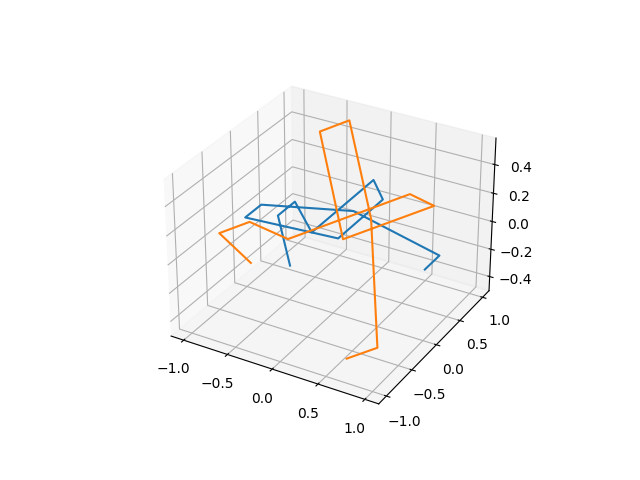

In [8]:
airplane_plt = [
    [1, 1, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0.3, 0.4, 0.3, 0, 0.1, 1.0, 0.8, -0.4, -0.7, -1, -0.8],
    [0, 0, 0.1, 0, 0, 0, 0, 0.2, 0.2, 0.5, 0.5, 0.1]
]

# x and y axis are swapped for the computation in order to fit the default FRU orientation of the figure
airplane_rot = [list(), list(), list()]
for xb, yb, zb in zip(* airplane_plt) :
    xe, ye, ze = (euler_app * sp.Matrix([[yb], [xb], [zb]]))
    airplane_rot[0].append(ye)
    airplane_rot[1].append(xe)
    airplane_rot[2].append(ze)
    
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(* airplane_plt)
ax.plot(* airplane_rot)
plt.show()

## Accélérations angulaires

[lien](https://aviation.stackexchange.com/questions/83993/the-relation-between-euler-angle-rate-and-body-axis-rates)
[lien](http://www.stengel.mycpanel.princeton.edu/Quaternions.pdf)

Les mesures $p$, $q$ et $r$ correspondent aux accélérations angulaire dans le repère _body_, pour les passer dans le repère _earth_, il faut introduire une correction différente pour chacun des axes.

$$\begin{split}
\begin{bmatrix}p \\ q \\ r\end{bmatrix} &=
\mathbf{I}_3 \begin{bmatrix}\dot \varphi \\ 0 \\ 0\end{bmatrix} + 
\mathbf{R}_\theta \begin{bmatrix}0 \\ \dot \theta \\ 0\end{bmatrix} +
\mathbf{R}_\theta \mathbf{R}_\psi \begin{bmatrix}0 \\ \dot \theta \\ 0\end{bmatrix} \\
&= \begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix} \begin{bmatrix}\dot \varphi \\ 0 \\ 0\end{bmatrix} +
\begin{bmatrix}
    1 & 0 & 0 \\
    0 & \cos \varphi & \sin \varphi \\
    0 & -\sin \varphi & \cos \varphi
\end{bmatrix} \begin{bmatrix}0 \\ \dot \theta \\ 0\end{bmatrix} +
\begin{bmatrix}
    1 & 0 & 0 \\
    0 & \cos \varphi & \sin \varphi \\
    0 & -\sin \varphi & \cos \varphi
\end{bmatrix} \begin{bmatrix}
    \cos \theta & 0 & -\sin \theta \\
    0 & 1 & 0 \\
    \sin \theta & 0 & \cos \theta
\end{bmatrix} \begin{bmatrix} 0 \\ \dot \theta \\ 0 \end{bmatrix} \\
&= \begin{bmatrix}1 & 0 & - \sin{\varphi}\\0 & \cos{\varphi} & \sin{\varphi} \cos{\theta}\\0 & - \sin{\varphi} & \cos{\theta} \cos{\varphi}\end{bmatrix} \begin{bmatrix} \dot \varphi \\ \dot\theta \\ \dot \psi \end{bmatrix}
\end{split}$$

L'inverse de cette matrice est un peu plus utile :

$$ \begin{bmatrix} \dot \varphi \\ \dot\theta \\ \dot \psi \end{bmatrix} = \begin{bmatrix}
1 & \sin \varphi \tan \theta & \cos \varphi \tan \theta \\
0 & \cos \varphi & -\sin \varphi \\
0 & \sin \varphi \sec \theta & \cos \varphi \sec \theta
\end{bmatrix} \begin{bmatrix}p \\ q \\ r\end{bmatrix}
$$


In [9]:
earth_to_body_rate = sp.Matrix([
    [1, 0, - sp.sin(phi)],
    [0, sp.cos(phi), sp.sin(phi)*sp.cos(theta)],
    [0, -sp.sin(phi), sp.cos(phi)*sp.cos(theta)]
])
earth_to_body_rate

Matrix([
[1,            0,           -sin(varphi)],
[0,  cos(varphi), sin(varphi)*cos(theta)],
[0, -sin(varphi), cos(theta)*cos(varphi)]])

In [6]:
body_to_earth_rate = earth_to_body_rate.inv().applyfunc(sp.simplify)
body_to_earth_rate

Matrix([
[1, sin(varphi)**2/cos(theta), sin(2*varphi)/(2*cos(theta))],
[0,               cos(varphi),                 -sin(varphi)],
[0,    sin(varphi)/cos(theta),       cos(varphi)/cos(theta)]])

https://www.youtube.com/watch?v=P7zg_Eruudw
https://www.youtube.com/watch?v=wEAFF38Ud8k

# Composition des vitesses dans un repère tournant

Soit un repère fixe (inertiel) $O_{mn}$ de centre $O$ et de vecteurs unitaires $\vec m$ et $\vec n$. Et un repère $B_{ij}$ de centre $B$ (défini dans $O_{mn}$), tournant à une vitesse angulaire $\omega$ et avec une accélération angulaire $\alpha$.

L'expression de la dérivée des vecteurs $\vec i$ et $\vec j$ du repère $B_{ij}$, en fonction de la vitesse angulaire $\omega$ est:

$$\begin{align}
\begin{bmatrix}
    \dot I \\
    \dot J
\end{bmatrix} &=
\frac{1}{dt} \begin{bmatrix}
    \cos d\theta & -\sin d\theta \\
    \sin d\theta & \cos d\theta \\
\end{bmatrix}
\begin{bmatrix}
    I \\
    J
\end{bmatrix} \\
&=
\begin{bmatrix}
    0 & -\omega \\
    \omega & 0
\end{bmatrix}
\begin{bmatrix}
    I \\
    J
\end{bmatrix}
\end{align}$$

Avec $P_A$ est la position du point A dans le repère $O_{mn}$ et $P_{A/B}$ la position de A dans le repère $B_{ij}$ :

$$\begin{align}
    P_A &= P_B + P_{A/B} \\
    &= P_B + (x I + y J)
\end{align}$$

Si l'on cherche la dérivée de $P_A$:

$$\begin{align}
\dot P_A &= \dot P_B + \frac{d}{dt}(x I + y J) \\
&= \dot P_B + x \dot{I} + y \dot{J} + \dot x I + \dot y J
\end{align}$$

Avec:
* $V_A$ (resp. $V_B$) la vitesse du point A (resp $B$) dans le repère $O_{MN}$
* $V_{A/B}$, la vitesse du point A dans le repère $B_{IJ}$ (la vitesse relative vue d'un observateur placé dans le repère tournant)

$$V_A = V_B + \omega \times P_{A/B} + V_{A/B}$$

Du coup, en se plaçant dans le cas où $O$ et $B$ sont confondus, on peut dériver un simple vecteur (par exemple vitesse):

$$\begin{align}
v &= v_x I + v_y J \\
\dot v &= \dot v_x I + \dot v_y J + v_x \dot I + v_y \dot J \\
\left ( \frac{dV}{dt} \right )_{ABS} &= \left ( \frac{dV}{dt} \right )_{REL} + \omega \times V
\end{align}$$